# Chapter 4 of the Machine Learning Journey

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import sklearn  
 

In [5]:
# Making some fake data to play around

X = 2 * np.random.rand(100, 1)
y = 4 + 3* X + np.random.randn(100, 1)

Text(0, 0.5, 'Y1')

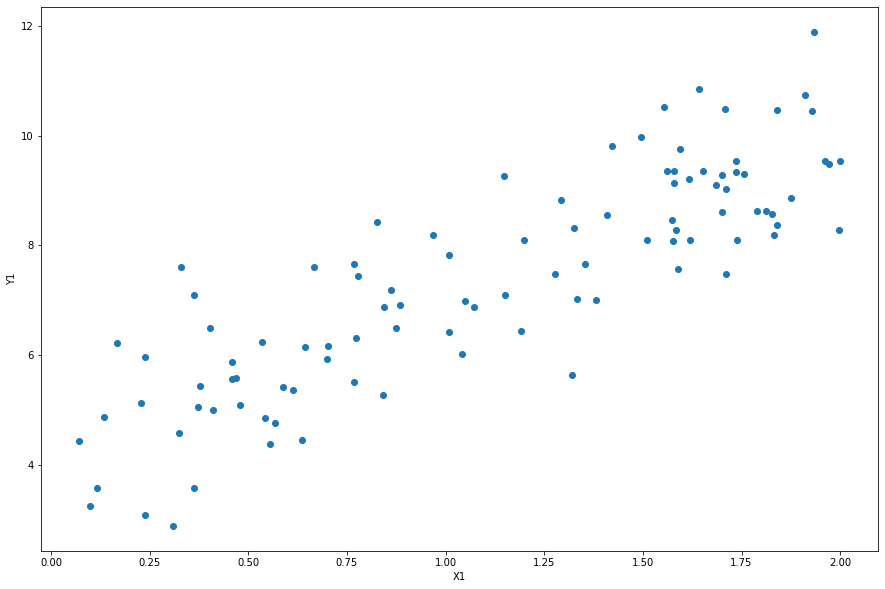

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(x=X, y=y)
ax.set_xlabel('X1')
ax.set_ylabel('Y1')

In [11]:
X_b = np.c_[np.ones((100,1)), X]
theta_b = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_b

array([[4.13224857],
       [2.89780126]])

### Comments

We were hoping for 4 +3X, but we got 4.13 and 2.89 +/- a little for when this is rerun. Theta_b was calculated using the moral equation that finds the best value of theta  
It is used to minimize a cost function to find the value of theta. 

In [16]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]


y_predict = X_new_b.dot(theta_b)
y_predict

array([[4.13224857],
       [9.92785109]])

(0.0, 2.0, 0.0, 15.0)

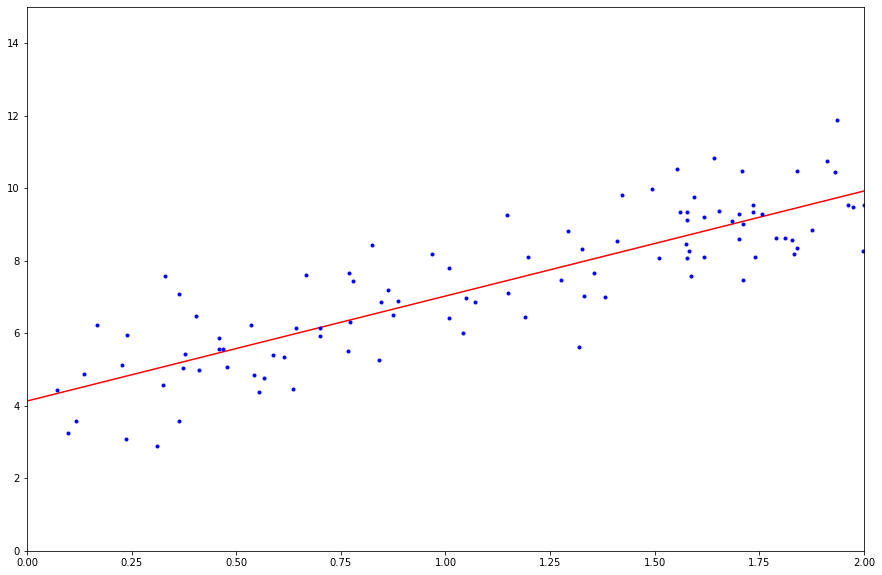

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))


ax.plot(X_new, y_predict, "r-", label='predictor')
ax.plot(X,y, "b.", label='data')

plt.axis([0, 2, 0, 15])


## Can do same thing with sklearn

In [26]:
from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression()
lin_reg.fit(X, y)

lin_reg.intercept_, lin_reg.coef_

(array([4.13224857]), array([[2.89780126]]))

In [27]:
lin_reg.predict(X_new)

array([[4.13224857],
       [9.92785109]])

# A standard gradient descent algo

In [37]:


def gradient_descent(lr=0.1, n_iterations=1000, m=100, data=X_b, target=y):
    shape = X_b.shape
    print(shape)
    theta = np.random.randn(2, 1)

    for iter in range(n_iterations):
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - target)
        theta = theta - lr * gradients
    return theta


In [38]:
gradient_descent()

(100, 2)


array([[4.13224857],
       [2.89780126]])

In [42]:

def learning_sched(t):
    t0 = 5
    t1 = 50
    return t0 / (t+t1)

def stochastic_gradient_descent(n_epochs=50, m=100, data=X_b, target=y):
    
    theta = np.random.randn(2, 1)
    for epoch in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = data[random_index:random_index+1]
            yi = target[random_index:random_index+1]
            gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
            eta = learning_sched(epoch * m+1)
            theta = theta - eta * gradients
    return theta

In [43]:
stochastic_gradient_descent()

array([[4.09025164],
       [2.88943162]])